# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

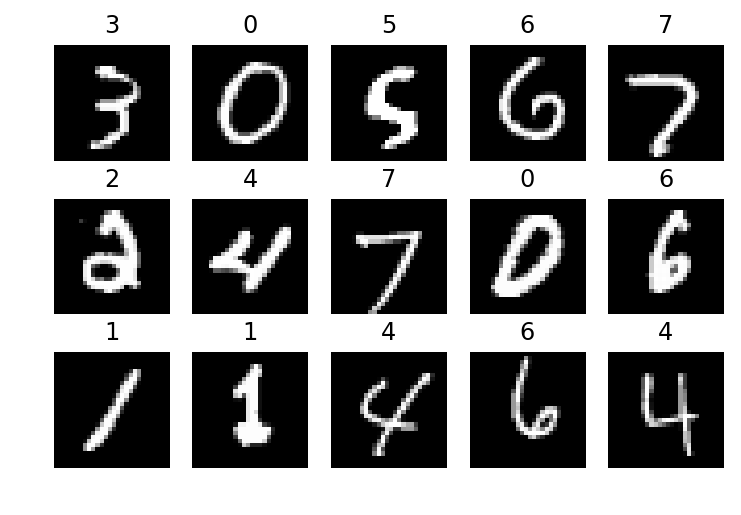

In [2]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    for index in range(X_len):
        digits = random.randint(1, 5)  #number of digits
        for i in range(digits):
            #select number randomly by index 'j'
            j = random.randint(0, X_len-1)
            X_gen[index,:,i*width:(i+1)*width,0]=X[j]
            y_gen[i][index][y[j]]=1
        for i in range(digits, n_len):
            y_gen[i][index][10] = 1
    
    return X_gen, y_gen

X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, test_size = 0.2)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

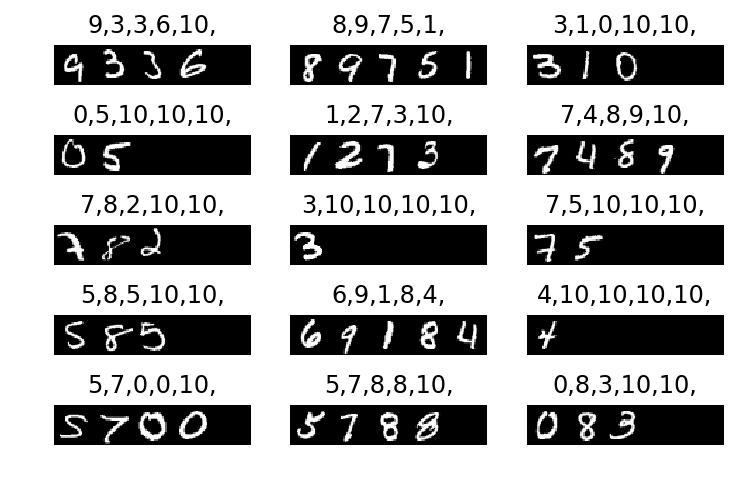

In [4]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**
首先使用随机数生成1-5之间任意一个数作为数字序列的长度，然后使用数据集中随机从抽取数字，使用slicing填充，对应的并标上对应的label。对于不足5位的序列，label标记为10.
将训练集分为训练集和验证集，能够更好的对训练出的模型进行优化，却不会让模型对测试集进行渗透。

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [5]:
from keras.models import Model
from keras.layers import *
from keras.utils import np_utils
from keras.models import Sequential
seed = 50
np.random.seed(seed)

In [8]:
def train_model():
    # create model
    
    model_input = Input((28, 28*5, 1))

    c1 = Conv2D(16, (3, 3), padding="same", activation="relu")(model_input)
    c1 = Conv2D(16, (3, 3), padding="same", activation="relu")(c1)
    p1 = MaxPooling2D(padding="same", pool_size=(2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), padding="same", activation="relu")(p1)
    c2 = Conv2D(32, (3, 3), padding="same", activation="relu")(c2)
    p2 = MaxPooling2D(padding="same", pool_size=(2, 2))(c2)
    
    c3 = Conv2D(64, (3, 3), padding="same", activation="relu")(p2)
    c3 = Conv2D(64, (3, 3), padding="same", activation="relu")(c3)
    p3 = MaxPooling2D(padding="same", pool_size=(2, 2))(c3)
    
    
    
    f = Flatten()(p3)
    d = Dropout(0.2)(f)
    # use list comprehension to replace the loop
    lst_output = [Dense(11, activation='softmax')(d) for i in range(n_len)]
    
    #x1= Dense(11, activation='softmax')(d)
    #x2= Dense(11, activation='softmax')(d)
    #x3= Dense(11, activation='softmax')(d)
    #x4= Dense(11, activation='softmax')(d)
    #x5= Dense(11, activation='softmax')(d)
    
    #lst_output = [x1, x2, x3, x4, x5]
    model = Model(input=model_input, output=lst_output)
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 
* 卷积层：用来提取提取图像的各种特征。它由多个卷积核组成，每个卷积核与输入数据做卷积运算，形成新的激活图。卷积运算就是在原图像上按照一定的步长滑动一个确定长宽的滑块，在滑块内，对应位置上的元素与滑块内对应的元素相乘后，所有的值相加作为当前滑块的卷积值。卷积层与全连接层的区别在于，全连接层使用前层的长与宽与深度（HxWxD）做n次（n个（HxWxD）filter）全局卷积（即矩阵相乘），卷积层则使用小范围的卷积。全连接层将所有输入认为与输出有关，容易出现overfitting， 而卷积层则是提取特征信息。卷积层将数据的深度提升了，使用了相同的边界“same-padding”，保证卷积层的输出长宽与输入一致,为了保证两次卷积的深度足够，不会因为卷积后图片的size减少而导致之后潜在的运算可能丧失了一些特征或者特征组合。虽然valid-padding也可，但是让输出图片变小，这里暂时让输入输出保持一致。
* 激活函数ReLU：线性整流函数，f(x)=max(0,x)。目前主流的激活函数，用来增强网络的非线性特性，训练速度相比与其他的激活函数要快，它是分段线性函数，负数输出为0，这样就造成了网络的稀疏性，并且减少了参数相互依存的问题，从而缓解了过拟合问题。Sigmoid函数在接近最小值附近时梯度变化缓慢，梯度计算公式计算中需要使用激活函数的导数，在接近最小值的时候，导数也下降很多，所以对训练速度产生影响。由于ReLU 是分段线性的，正值的导数为1，对梯度减小不会产生影响。而传统的sigmoid由于两端饱和，容易丢失信息，使用ReLu解决了Sigmoid激活函数会出现梯度消失的问题。
* Pooling层：选择max-pooling, 对邻域内特征点取最大值。对原始特征信号进行抽样，减少训练参数，减轻过拟合。使用最大池化而不是最小池化的意义在于，我们希望降维的同时，又希望保持之前的特征，所以取最大特征是最合适的，类似于我只在乎这个小方框里有没有某特征，而不在乎这个特征具体在哪个像素。
* Flatten: 将矩阵转换为向量。为全连接作数据准备。
* Dropout: 20%的概率将某个隐藏节点暂时去掉，权值更新不再依赖于固有关系隐藏节点的共同作用，阻止了某些特征仅仅在其它特定的特征下才有效果的情况，防止过拟合。
* softmax: 将预测结果转换为概率，概率和为1。使用softmax,其中一个分量值大于其他分量，则逼近1，其他逼近0，sigmoid函数用于概率逼近1或者0，可用向量的编码方法处理多分类问题，如两个物体是否存在的问题[1,1],[1,0],[0,0],[0,1].数据集中没有多种物体同时存在的情况，所以使用softmax。
* 优化器为adam: 比SGD算法效率高。adam能够对每个参数动态动态调整学习率，经过偏置校正后每一次迭代学习率都有确定的范围，使得参数比较平稳。而SGD使用固定的学习率，对于稀疏数据，有时候我们想对不常出现的特征更新的快，常出现的特征更新的慢，SGD不能满足要求。
参考http://sebastianruder.com/optimizing-gradient-descent/

### 可视化你的网络模型

参考链接：visualization

可以是 PNG 格式，也可以是 SVG 格式。

C:\Users\Jiangyuxiang\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:32: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


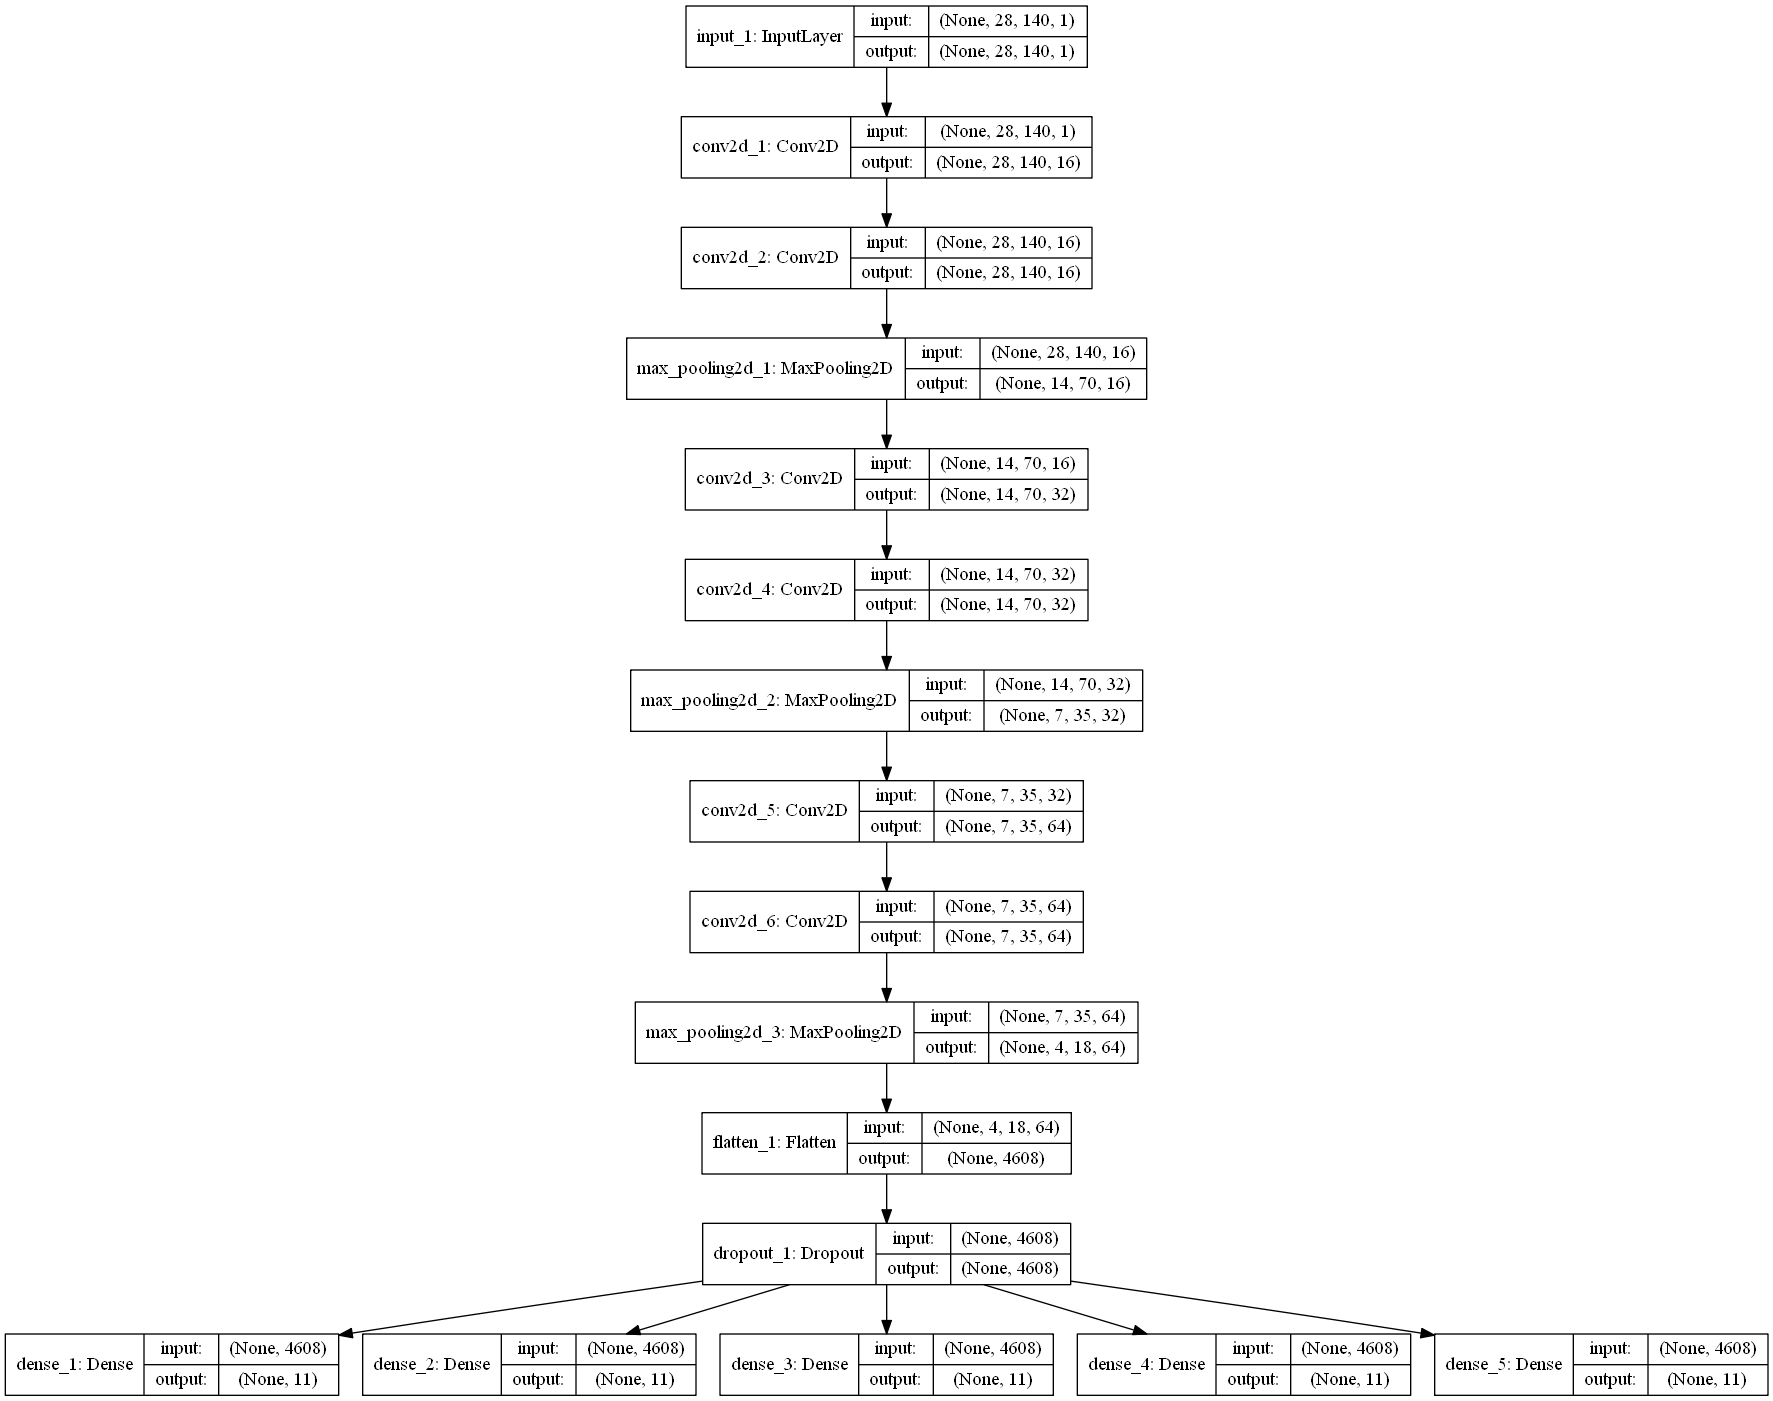

In [9]:
#from keras.utils.visualize_util import plot, model_to_dot
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import Image, SVG

model = train_model()
# TODO: 可视化你的模型
plot_model(model, show_shapes=True)
Image(filename = 'model.png')

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**
采用的是CNN模型。层数为12层",
    * 第一层为深度为16的卷积层，3x3,输入直接与第一层相连。
    * 第二层为深度为16的卷积层，3x3,输入直接与第一层相连。
    * 第三层为max-pooling层，2x2, 直接相连
    * 第四层为深度为32的卷积层，3x3,直接与上一层与下一层相连。
    * 第五层为深度为32的卷积层，3x3,直接与上一层与下一层相连。
    * 第六层为max-pooling层，2x2, 直接相连。
    * 第七层为深度为64的卷积层，3x3,直接相连。
    * 第八层为深度为64的卷积层，3x3,直接相连。
    * 第九层为max-pooling层，2x2, 直接相连
    * 第十层为flatten
    * 第十一层为dropout。
    * 第十二层为5个全连接层，输出作为分类。

### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [10]:
# TODO: 训练你的模型
model = train_model()
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2)
log = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=200, verbose=2, callbacks=[early_stop])

C:\Users\Jiangyuxiang\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:32: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
60s - loss: 1.6220 - dense_6_loss: 0.4557 - dense_7_loss: 0.4046 - dense_8_loss: 0.3492 - dense_9_loss: 0.2476 - dense_10_loss: 0.1650 - dense_6_acc: 0.8541 - dense_7_acc: 0.8714 - dense_8_acc: 0.8891 - dense_9_acc: 0.9235 - dense_10_acc: 0.9536 - val_loss: 0.2306 - val_dense_6_loss: 0.0708 - val_dense_7_loss: 0.0590 - val_dense_8_loss: 0.0477 - val_dense_9_loss: 0.0366 - val_dense_10_loss: 0.0166 - val_dense_6_acc: 0.9782 - val_dense_7_acc: 0.9808 - val_dense_8_acc: 0.9862 - val_dense_9_acc: 0.9897 - val_dense_10_acc: 0.9948
Epoch 2/20
53s - loss: 0.1870 - dense_6_loss: 0.0546 - dense_7_loss: 0.0486 - dense_8_loss: 0.0400 - dense_9_loss: 0.0285 - dense_10_loss: 0.0153 - dense_6_acc: 0.9830 - dense_7_acc: 0.9846 - dense_8_acc: 0.9867 - dense_9_acc: 0.9909 - dense_10_acc: 0.9950 - val_loss: 0.1564 - val_dense_6_loss: 0.0448 - val_dense_7_loss: 0.0395 - val_dense_8_loss: 0.0323 - val_dense_9_loss: 0.0290 - val_dense_10_loss: 0.

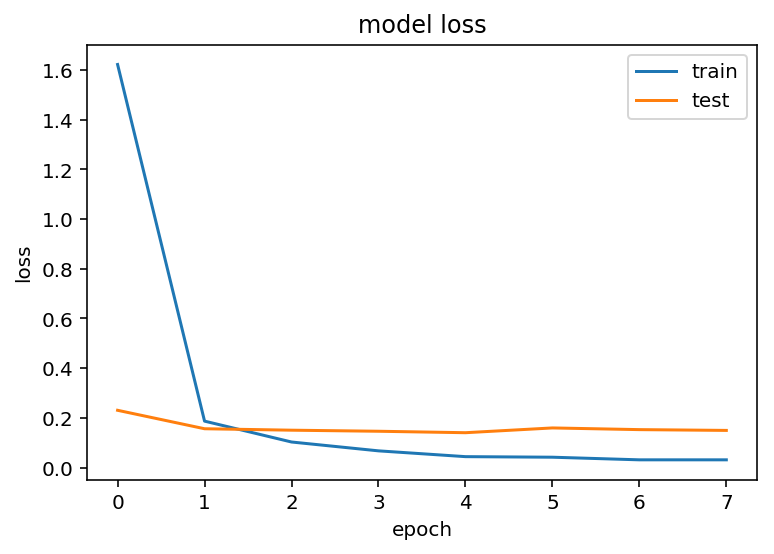

In [11]:
import matplotlib.pyplot as plt

plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [12]:
def evaluate(model):
    # TODO: 按照错一个就算错的规则计算准确率
    y_pred = model.predict(X_test, batch_size=200)
    pred = np.argmax(y_pred, axis=2)
    test = np.argmax(y_test, axis=2)
    accuracy = np.min((pred==test), axis=0).mean()
    return accuracy

evaluate(model)

0.97160000000000002

### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**准确率如上所示，在97%左右。基本能够满足识别的需求，但是准确率不是特别高，优化模型可以一定程度提高准确率。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

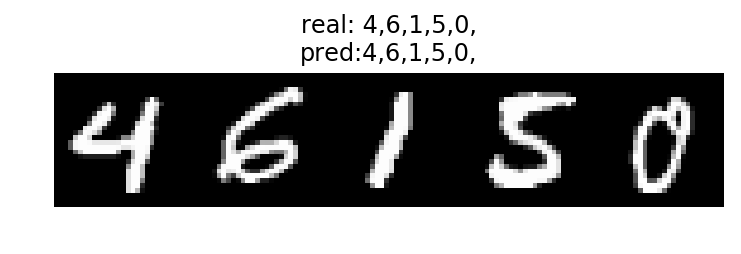

In [13]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。

In [14]:
model.save_weights('model.h5')
with open('model.json', 'w') as f:
    f.write(model.to_json())

#### reference

https://github.com/fchollet/keras/issues/3928